In [1]:
import tensorflow as tf

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/",one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
type(mnist.train.images)


numpy.ndarray

In [6]:
mnist.train.images[2].shape


(784,)

In [7]:
sample = mnist.train.images[2].reshape(28,28)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

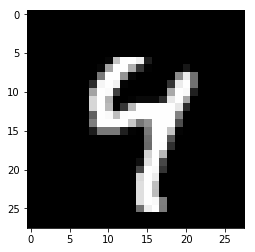

In [9]:
plt.imshow(sample,cmap="gray" )

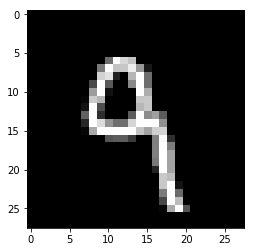

In [10]:
plt.imshow(mnist.train.images[24].reshape(28,28),cmap="gray" )

In [11]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [12]:

# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
n_samples = mnist.train.num_examples

In [13]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [14]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [15]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [16]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [17]:
pred = multilayer_perceptron(x, weights, biases)

In [20]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [22]:
init = tf.global_variables_initializer()

In [23]:
Xsamp,ysamp = mnist.train.next_batch(1)

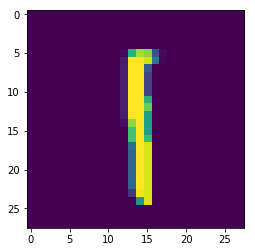

In [24]:
plt.imshow(Xsamp.reshape(28,28))

In [25]:
print(ysamp)

[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]


In [26]:
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=176.0233
Epoch: 2 cost=41.1797
Epoch: 3 cost=25.8292
Epoch: 4 cost=17.7326
Epoch: 5 cost=12.6556
Epoch: 6 cost=9.3237
Epoch: 7 cost=6.8269
Epoch: 8 cost=5.1319
Epoch: 9 cost=3.7899
Epoch: 10 cost=2.8930
Epoch: 11 cost=2.1220
Epoch: 12 cost=1.6225
Epoch: 13 cost=1.2551
Epoch: 14 cost=1.0095
Epoch: 15 cost=0.8513
Model has completed 15 Epochs of Training


In [27]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [28]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In [29]:
correct_predictions = tf.cast(correct_predictions, "float")

In [30]:
accuracy = tf.reduce_mean(correct_predictions)

In [31]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [32]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [33]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [34]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9475


#more layer

In [37]:
weights2 = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
biases2 = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [36]:
n_hidden_3 = 256 

In [38]:
def multilayer_perceptron2(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

In [39]:
pred = multilayer_perceptron2(x, weights2, biases2)

In [40]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [41]:
init = tf.global_variables_initializer()

In [42]:
sess = tf.InteractiveSession()

# Intialize all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=194.3884
Epoch: 2 cost=39.3679
Epoch: 3 cost=24.2903
Epoch: 4 cost=16.8991
Epoch: 5 cost=12.2340
Epoch: 6 cost=8.9784
Epoch: 7 cost=6.7007
Epoch: 8 cost=4.9957
Epoch: 9 cost=3.8180
Epoch: 10 cost=2.7598
Epoch: 11 cost=2.0558
Epoch: 12 cost=1.4833
Epoch: 13 cost=1.1686
Epoch: 14 cost=0.8848
Epoch: 15 cost=0.6829
Model has completed 15 Epochs of Training


In [43]:
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [44]:
correct_predictions = tf.cast(correct_predictions, "float")

In [45]:
accuracy = tf.reduce_mean(correct_predictions)

In [46]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9476
